# Imports

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For matrix_array_20 = 1hour data

In [2]:
matrix_array_20 = np.load('Data/matrix_array_20_normalized.npy')
# answer_array_20 = np.load('Data/answer_array_20.npy')

# # List of file names to load
# file_names_answer = [f"Data/answer_array_20_{i}.npy" for i in range(11)]

# # Load each file and store in a list
# loaded_arrays_answer = [np.load(file_name) for file_name in file_names_answer]

# # Concatenate all arrays into a single array
# answer_array_20 = np.concatenate(loaded_arrays_answer, axis=0)

In [5]:
# np.save('Data/answer_array_20.npy',answer_array_20)
answer_array_20 = np.load('Data/answer_array_20.npy')

In [6]:
matrix_array_20.shape, answer_array_20.shape    

((587563, 20, 19), (587563, 3))

In [4]:
from sklearn.model_selection import train_test_split

X = matrix_array_20
y = answer_array_20


X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.8, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

In [5]:
# Flatten the X_train data
# This assumes X_train is a list of numpy arrays with a shape of (20, 19)
X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])

# answer = chunk.iloc[i+19][['plus_6', 'minus_6', 'zero_6']].tolist()
# Assuming y_train is a list or array of arrays like [[1, 0, 0], [0, 1, 0], [0, 0, 1], ...]
y_train_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_train])
y_test_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_test])
# zero = 0, up = 1, down = -1

In [6]:
np.unique(y_test_transformed)

array([-1,  0,  1])

### Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=1, verbose=1, n_jobs=-1)

In [8]:
RFC.fit(X_train_flattened, y_train_transformed)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestClassifier(n_jobs=-1, random_state=1, verbose=1)

In [23]:
import joblib

# import model
RFC = joblib.load('Models/RFC_model.pkl')

In [24]:
y_pred = RFC.predict(X_test_flattened)


ValueError: X has 760 features, but RandomForestClassifier is expecting 380 features as input.

In [15]:
np.unique(y_pred)

array([-1,  0,  1])

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.686796354445891
Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.68      0.67     81380
           0       0.72      0.77      0.74     74865
           1       0.68      0.62      0.65     78781

    accuracy                           0.69    235026
   macro avg       0.69      0.69      0.69    235026
weighted avg       0.69      0.69      0.69    235026



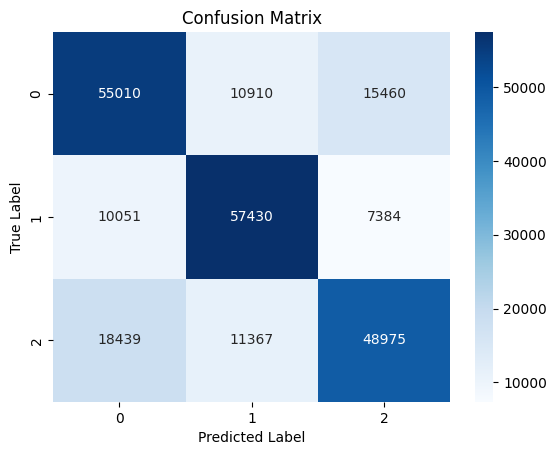

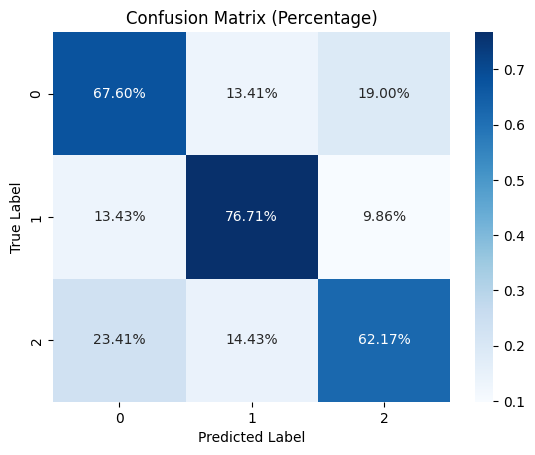

In [12]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
wrong_count = cm[0][1]+cm[0][2] + cm[1][0]+cm[1][2] + cm[2][0]+cm[2][1]
correct_count = cm[0][0] + cm[1][1] + cm[2][2]

wrong_count, correct_count

(73611, 161415)

In [13]:
cm_normalized
'''
array([[0.67596461, 0.13406242, 0.18997297],
       [0.13425499, 0.76711414, 0.09863087],
       [0.2340539 , 0.14428606, 0.62166004]])
-1 -> -1 : 0.67
-1 -> 0  : 0.1340
-1 -> 1  : 0.18
0 -> -1 : 0.1342
0 -> 0  : 0.76
0 -> 1  : 0.09
'''

array([[0.67596461, 0.13406242, 0.18997297],
       [0.13425499, 0.76711414, 0.09863087],
       [0.2340539 , 0.14428606, 0.62166004]])

In [10]:
data = pd.read_csv('Data/df_all.csv')
data = data.drop(['Open time', 'Close time', 'Ignore','up_cross','down_cross','minutes','log_minutes','side','plus_6','minus_6','zero_6'], axis=1)
print(data.columns)

# Rename columns
new_columns = []
for i in range(20):  # for each time step
    new_columns.extend([f"{col}_{i}" for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume','MA5','MA10','MA20','MA30','MA60','MA120','MA240', 'BB0','BB+','BB-' ]])
print(len(new_columns))

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')
380


(380,)


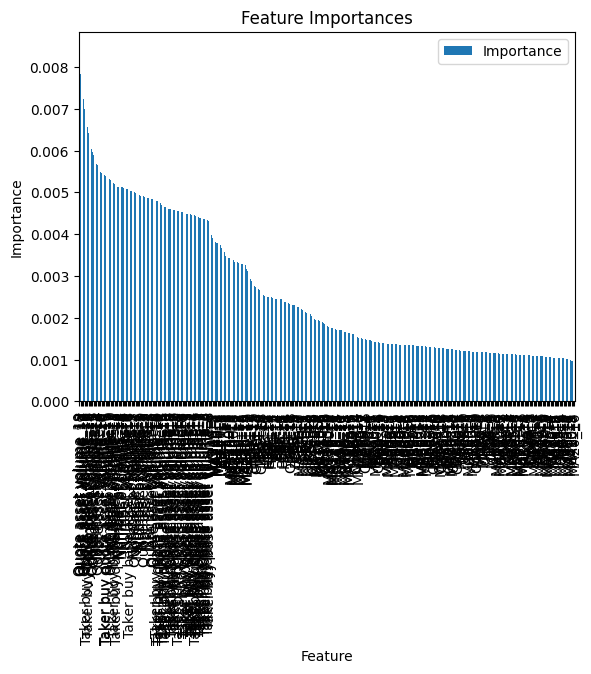

In [16]:
# Get feature importances
importances = RFC.feature_importances_
print(importances.shape)
# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

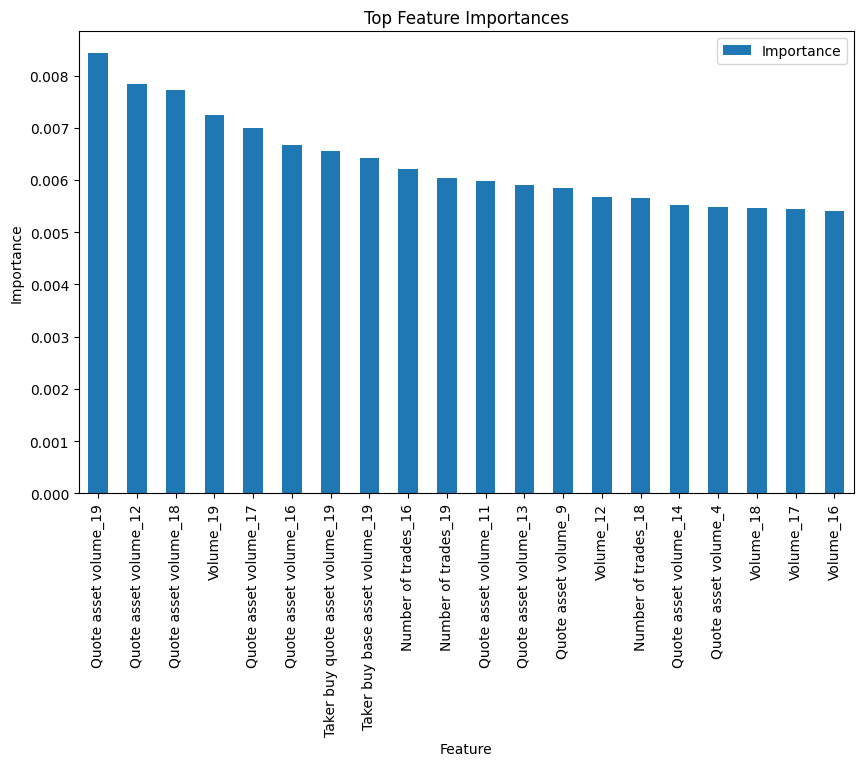

Sorted Feature Importances:
                        Feature  Importance
          Quote asset volume_19    0.008422
          Quote asset volume_12    0.007845
          Quote asset volume_18    0.007717
                      Volume_19    0.007239
          Quote asset volume_17    0.006997
          Quote asset volume_16    0.006662
Taker buy quote asset volume_19    0.006561
 Taker buy base asset volume_19    0.006414
            Number of trades_16    0.006213
            Number of trades_19    0.006035
          Quote asset volume_11    0.005979
          Quote asset volume_13    0.005901
           Quote asset volume_9    0.005856
                      Volume_12    0.005681
            Number of trades_18    0.005653
          Quote asset volume_14    0.005525
           Quote asset volume_4    0.005479
                      Volume_18    0.005456
                      Volume_17    0.005436
                      Volume_16    0.005408
Taker buy quote asset volume_18    0.005406
Take

In [17]:
# Display the top N features in a bar chart
top_n = 20  # You can adjust this number
top_features = feature_importance_df.head(top_n)
top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Top Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of features and their importances
print("Sorted Feature Importances:")
print(feature_importance_df.to_string(index=False))

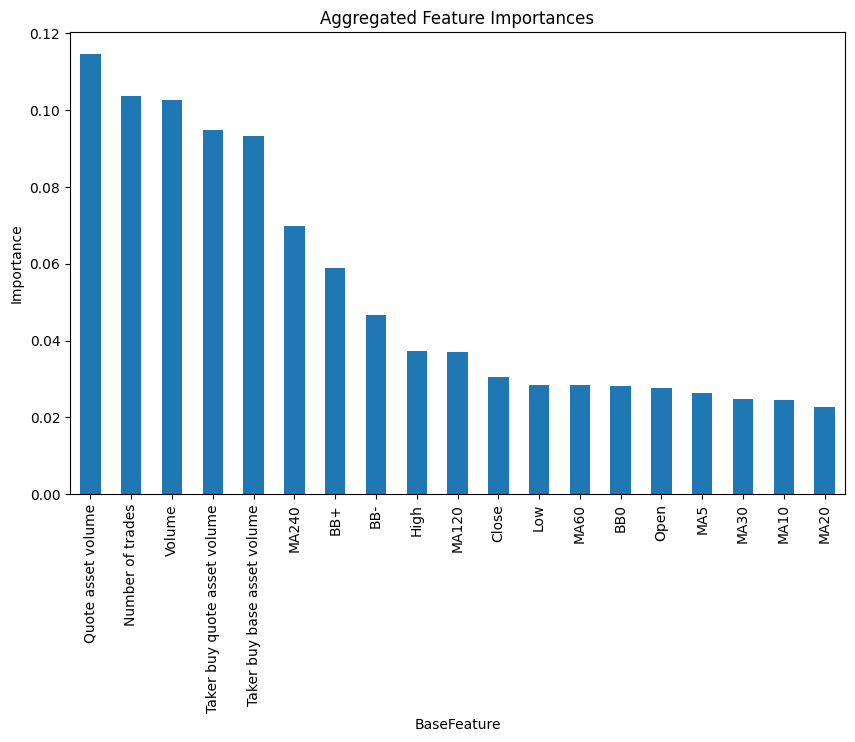

Sorted Aggregated Feature Importances:
BaseFeature
Quote asset volume              0.114568
Number of trades                0.103773
Volume                          0.102724
Taker buy quote asset volume    0.094866
Taker buy base asset volume     0.093248
MA240                           0.069839
BB+                             0.058783
BB-                             0.046641
High                            0.037243
MA120                           0.037066
Close                           0.030577
Low                             0.028339
MA60                            0.028328
BB0                             0.028243
Open                            0.027577
MA5                             0.026233
MA30                            0.024714
MA10                            0.024427
MA20                            0.022808


In [20]:
# Assuming importances and new_columns are defined
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Split the feature names and aggregate importances
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
aggregated_importances = feature_importance_df.groupby('BaseFeature')['Importance'].sum()

# Sort by importance
aggregated_importances = aggregated_importances.sort_values(ascending=False)

# Plot aggregated feature importances
aggregated_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of aggregated features and their importances
print("Sorted Aggregated Feature Importances:")
print(aggregated_importances.to_string())


In [19]:
import joblib

# Assuming your model is named RFC
joblib.dump(RFC, 'Models/RFC_model.pkl')

['Models/RFC_model.pkl']

### Linear SVC 

#### not that good performance

In [80]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC model
linear_svc = LinearSVC(random_state=0)

# Fit the model
linear_svc.fit(X_train_flattened, y_train_transformed)

# Make predictions
y_pred = linear_svc.predict(X_test_flattened)



/Users/bae/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bae/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.4184047722379652
Classification Report:
              precision    recall  f1-score   support

          -1       0.27      0.00      0.00     81380
           0       0.44      0.69      0.54     74865
           1       0.40      0.59      0.48     78781

    accuracy                           0.42    235026
   macro avg       0.37      0.43      0.34    235026
weighted avg       0.37      0.42      0.33    235026



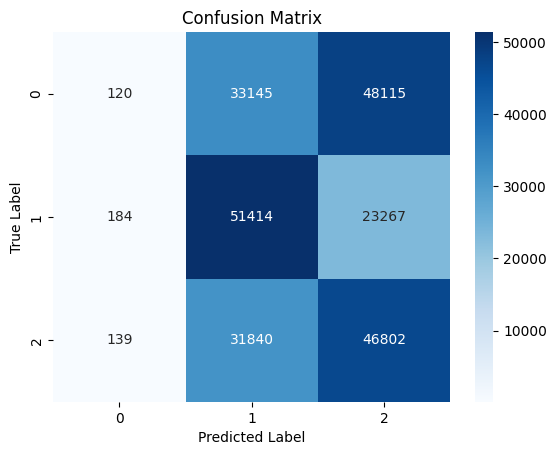

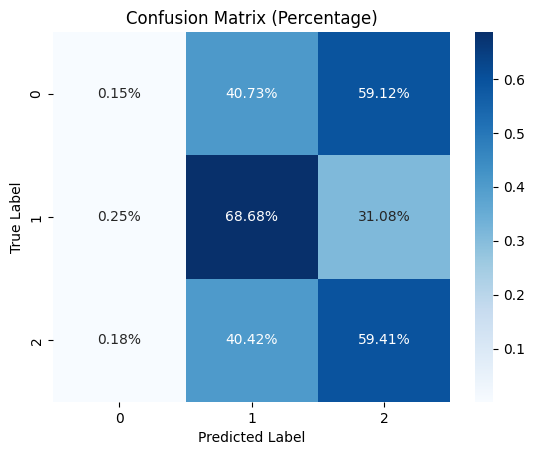

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)


# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [83]:
# import joblib

# # Assuming your model is named RFC
# joblib.dump(linear_svc, 'Models/Linear_SVC_model.pkl')

['Models/Linear_SVC_model.pkl']

### Nu SVC

#### takes too long time

In [85]:
from sklearn.svm import NuSVC

# Initialize the NuSVC model
# The nu parameter may need to be adjusted based on your dataset
nu_svc = NuSVC(nu=0.5, random_state=0)

# Fit the model
nu_svc.fit(X_train_flattened, y_train_transformed)

# Make predictions
y_pred = nu_svc.predict(X_test_flattened)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)


# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import joblib

# Assuming your model is named RFC
joblib.dump(nu_svc, 'Models/Nu_SVC_model.pkl')

### SVC

#### takes too long time

In [21]:
from sklearn.svm import SVC

# Initialize the SVC model
# You can change the kernel to 'linear', 'poly', 'rbf', 'sigmoid', etc.
svc = SVC(kernel='rbf', random_state=0)

# Fit the model
svc.fit(X_train_flattened, y_train_transformed)

# Make predictions
y_pred = svc.predict(X_test_flattened)



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)


# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Get feature importances
importances = linear_svc.feature_importances_
print(importances.shape)
# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

# Display the top N features in a bar chart
top_n = 20  # You can adjust this number
top_features = feature_importance_df.head(top_n)
top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Top Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of features and their importances
print("Sorted Feature Importances:")
print(feature_importance_df.to_string(index=False))

In [ ]:
import joblib

# Assuming your model is named RFC
joblib.dump(svc, 'Models/SVC_model.pkl')

### XGBoost

In [7]:
import xgboost as xgb

# Assuming y_train is a list or array of arrays like [[1, 0, 0], [0, 1, 0], [0, 0, 1], ...]
y_train_transformed = np.array([2 if np.argmax(y) == 0 else (1 if np.argmax(y) == 2 else 0) for y in y_train])
y_test_transformed = np.array([2 if np.argmax(y) == 0 else (1 if np.argmax(y) == 2 else 0) for y in y_test])

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=0)  # multi:softprob for multi-class classification

# Fit the model
xgb_model.fit(X_train_flattened, y_train_transformed)

# Make predictions
y_pred = xgb_model.predict(X_test_flattened)

Accuracy: 0.5612825815016211
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52     81380
           1       0.63      0.71      0.67     74865
           2       0.53      0.46      0.49     78781

    accuracy                           0.56    235026
   macro avg       0.56      0.56      0.56    235026
weighted avg       0.56      0.56      0.56    235026



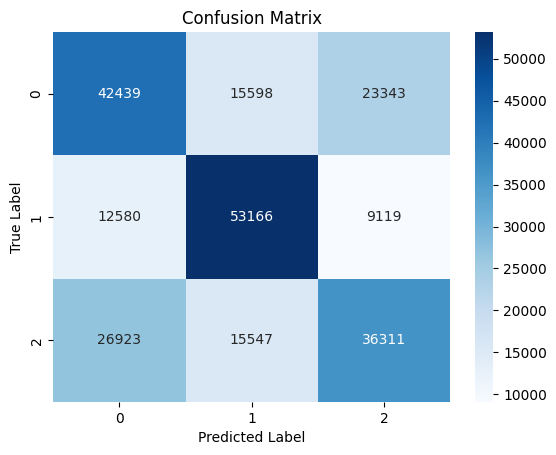

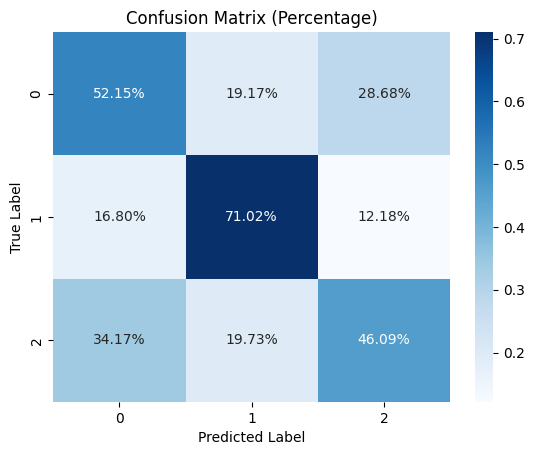

(380,)


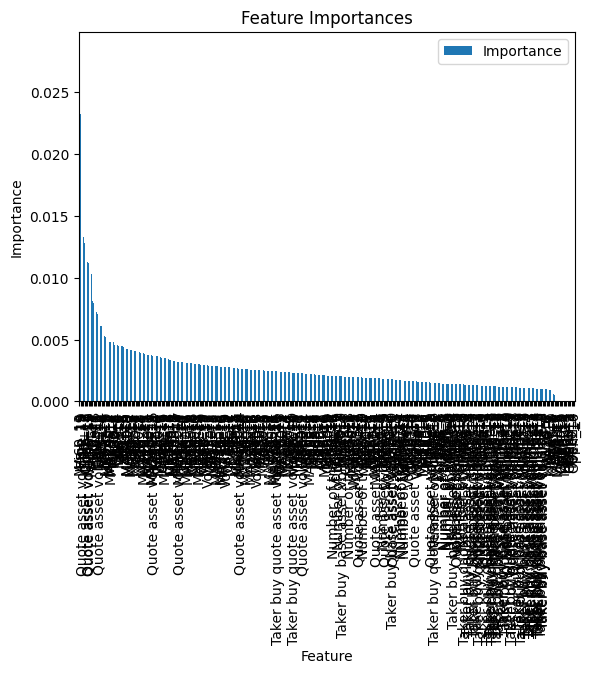

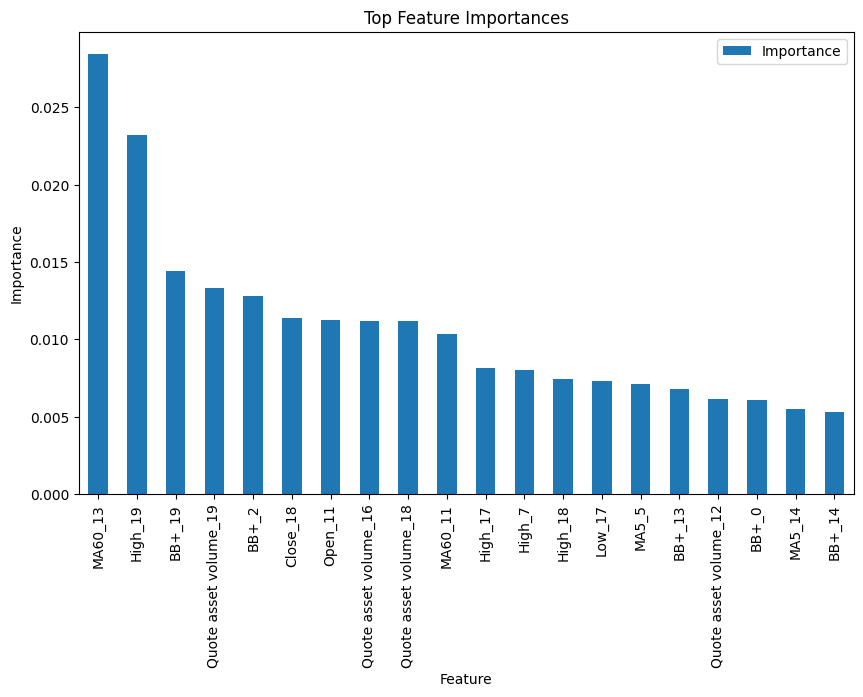

Sorted Feature Importances:
                        Feature  Importance
                        MA60_13    0.028452
                        High_19    0.023207
                         BB+_19    0.014420
          Quote asset volume_19    0.013280
                          BB+_2    0.012825
                       Close_18    0.011387
                        Open_11    0.011255
          Quote asset volume_16    0.011200
          Quote asset volume_18    0.011167
                        MA60_11    0.010319
                        High_17    0.008133
                         High_7    0.007992
                        High_18    0.007397
                         Low_17    0.007271
                          MA5_5    0.007093
                         BB+_13    0.006777
          Quote asset volume_12    0.006128
                          BB+_0    0.006069
                         MA5_14    0.005507
                         BB+_14    0.005262
                        MA60_15    0.005193
    

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)


# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Get feature importances
importances = xgb_model.feature_importances_
print(importances.shape)
# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

# Display the top N features in a bar chart
top_n = 20  # You can adjust this number
top_features = feature_importance_df.head(top_n)
top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Top Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of features and their importances
print("Sorted Feature Importances:")
print(feature_importance_df.to_string(index=False))

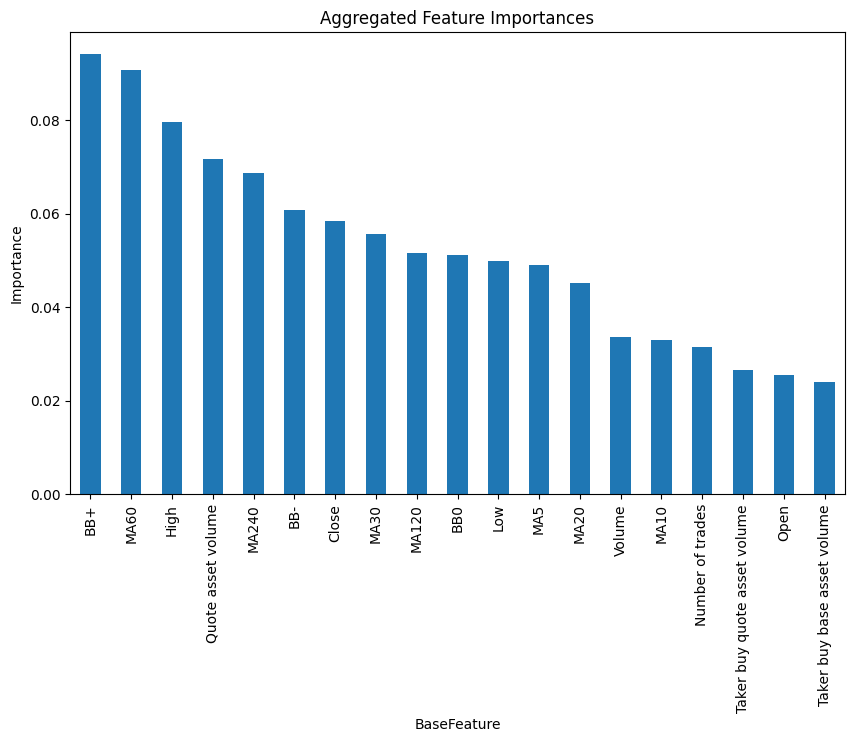

Sorted Aggregated Feature Importances:
BaseFeature
BB+                             0.094079
MA60                            0.090730
High                            0.079480
Quote asset volume              0.071601
MA240                           0.068749
BB-                             0.060818
Close                           0.058388
MA30                            0.055548
MA120                           0.051621
BB0                             0.051156
Low                             0.049783
MA5                             0.048917
MA20                            0.045244
Volume                          0.033637
MA10                            0.032879
Number of trades                0.031374
Taker buy quote asset volume    0.026662
Open                            0.025407
Taker buy base asset volume     0.023926


In [12]:
# Assuming importances and new_columns are defined
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Split the feature names and aggregate importances
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
aggregated_importances = feature_importance_df.groupby('BaseFeature')['Importance'].sum()

# Sort by importance
aggregated_importances = aggregated_importances.sort_values(ascending=False)

# Plot aggregated feature importances
aggregated_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of aggregated features and their importances
print("Sorted Aggregated Feature Importances:")
print(aggregated_importances.to_string())


# For matrix_array_40 = 2hour data

In [3]:
matrix_array_40 = np.load('Data/matrix_array_40_normalized.npy')
answer_array_40 = np.load('Data/answer_array_40.npy')


In [4]:
matrix_array_40.shape, answer_array_40.shape    

((587343, 40, 19), (587343, 3))

In [5]:
from sklearn.model_selection import train_test_split

X = matrix_array_40
y = answer_array_40


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1, stratify=y)

In [6]:
# Flatten the X_train data
# This assumes X_train is a list of numpy arrays with a shape of (20, 19)
X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])

# answer = chunk.iloc[i+19][['plus_6', 'minus_6', 'zero_6']].tolist()
# Assuming y_train is a list or array of arrays like [[1, 0, 0], [0, 1, 0], [0, 0, 1], ...]
y_train_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_train])
y_test_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_test])
# zero = 0, up = 1, down = -1

In [7]:
X_train_flattened.shape, X_test_flattened.shape, y_train_transformed.shape, y_test_transformed.shape

((528608, 760), (58735, 760), (528608,), (58735,))

In [8]:
np.unique(y_test_transformed)

array([-1,  0,  1])

In [9]:
del X, y, X_train, X_test, y_train, y_test, matrix_array_40, answer_array_40
import gc
gc.collect()

0

### Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=1, verbose=1, n_jobs=-1)

In [11]:
RFC.fit(X_train_flattened, y_train_transformed)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.9min finished


RandomForestClassifier(n_jobs=-1, random_state=1, verbose=1)

In [12]:
# import joblib

# # import model
# RFC = joblib.load('Models/RFC_model_40.pkl')

In [13]:
y_pred = RFC.predict(X_test_flattened)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


In [14]:
y_pred

array([-1,  0,  1, ..., -1,  1,  1])

In [15]:
np.unique(y_pred)

array([-1,  0,  1])

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8500723589001448
Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.86      0.85     20342
           0       0.83      0.88      0.85     18715
           1       0.87      0.82      0.84     19678

    accuracy                           0.85     58735
   macro avg       0.85      0.85      0.85     58735
weighted avg       0.85      0.85      0.85     58735



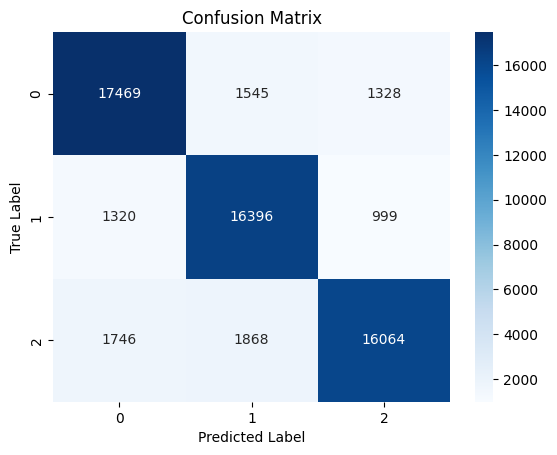

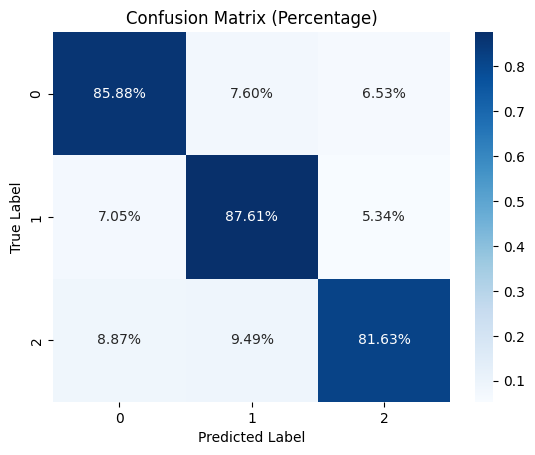

In [17]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
wrong_count = cm[0][1]+cm[0][2] + cm[1][0]+cm[1][2] + cm[2][0]+cm[2][1]
correct_count = cm[0][0] + cm[1][1] + cm[2][2]

print(f'wrong count : {wrong_count}, correct count : {correct_count}')
print(f'accuracy? : {100*correct_count/(wrong_count+correct_count)}') 

wrong count : 8806, correct count : 49929
accuracy? : 85.00723589001447


In [19]:
cm_normalized


array([[0.85876512, 0.07595123, 0.06528365],
       [0.07053166, 0.8760887 , 0.05337964],
       [0.08872853, 0.09492835, 0.81634312]])

In [21]:
'''
array([[0.67596461, 0.13406242, 0.18997297],
       [0.13425499, 0.76711414, 0.09863087],
       [0.2340539 , 0.14428606, 0.62166004]])
-1 -> -1 : 0.67
-1 -> 0  : 0.1340
-1 -> 1  : 0.18
0 -> -1 : 0.1342
0 -> 0  : 0.76
0 -> 1  : 0.09
'''

'\narray([[0.67596461, 0.13406242, 0.18997297],\n       [0.13425499, 0.76711414, 0.09863087],\n       [0.2340539 , 0.14428606, 0.62166004]])\n-1 -> -1 : 0.67\n-1 -> 0  : 0.1340\n-1 -> 1  : 0.18\n0 -> -1 : 0.1342\n0 -> 0  : 0.76\n0 -> 1  : 0.09\n'

In [22]:
data = pd.read_csv('Data/df_all.csv')
data = data.drop(['Open time', 'Close time', 'Ignore','up_cross','down_cross','minutes','log_minutes','side','plus_6','minus_6','zero_6'], axis=1)
print(data.columns)

# Rename columns
new_columns = []
for i in range(40):  # for each time step
    new_columns.extend([f"{col}_{i}" for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume','MA5','MA10','MA20','MA30','MA60','MA120','MA240', 'BB0','BB+','BB-' ]])
print(len(new_columns))

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')
760


(760,)


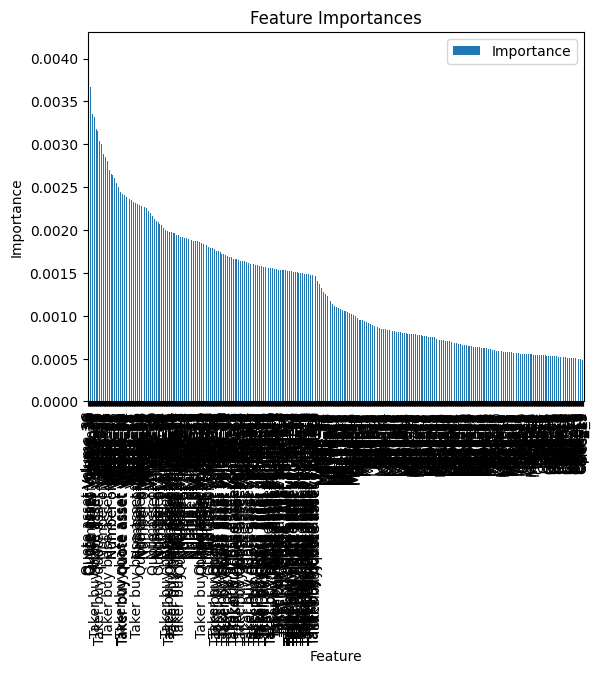

In [23]:
# Get feature importances
importances = RFC.feature_importances_
print(importances.shape)
# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

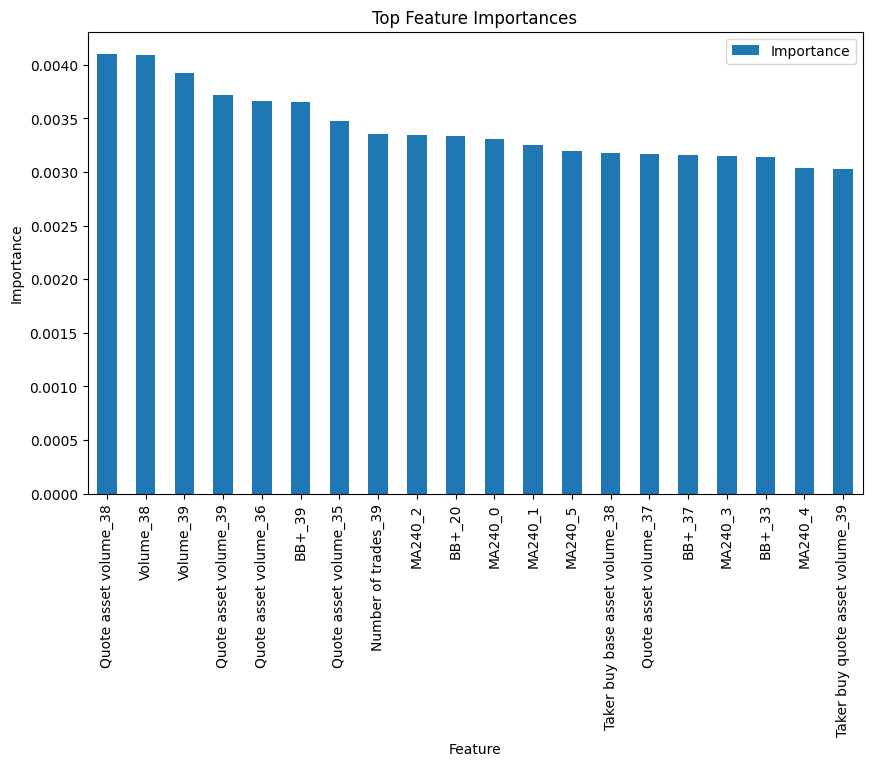

Sorted Feature Importances:
                        Feature  Importance
          Quote asset volume_38    0.004105
                      Volume_38    0.004096
                      Volume_39    0.003926
          Quote asset volume_39    0.003715
          Quote asset volume_36    0.003664
                         BB+_39    0.003656
          Quote asset volume_35    0.003473
            Number of trades_39    0.003353
                        MA240_2    0.003343
                         BB+_20    0.003332
                        MA240_0    0.003313
                        MA240_1    0.003254
                        MA240_5    0.003201
 Taker buy base asset volume_38    0.003176
          Quote asset volume_37    0.003172
                         BB+_37    0.003157
                        MA240_3    0.003145
                         BB+_33    0.003141
                        MA240_4    0.003039
Taker buy quote asset volume_39    0.003028
                        MA240_7    0.003003
    

In [24]:
# Display the top N features in a bar chart
top_n = 20  # You can adjust this number
top_features = feature_importance_df.head(top_n)
top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Top Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of features and their importances
print("Sorted Feature Importances:")
print(feature_importance_df.to_string(index=False))

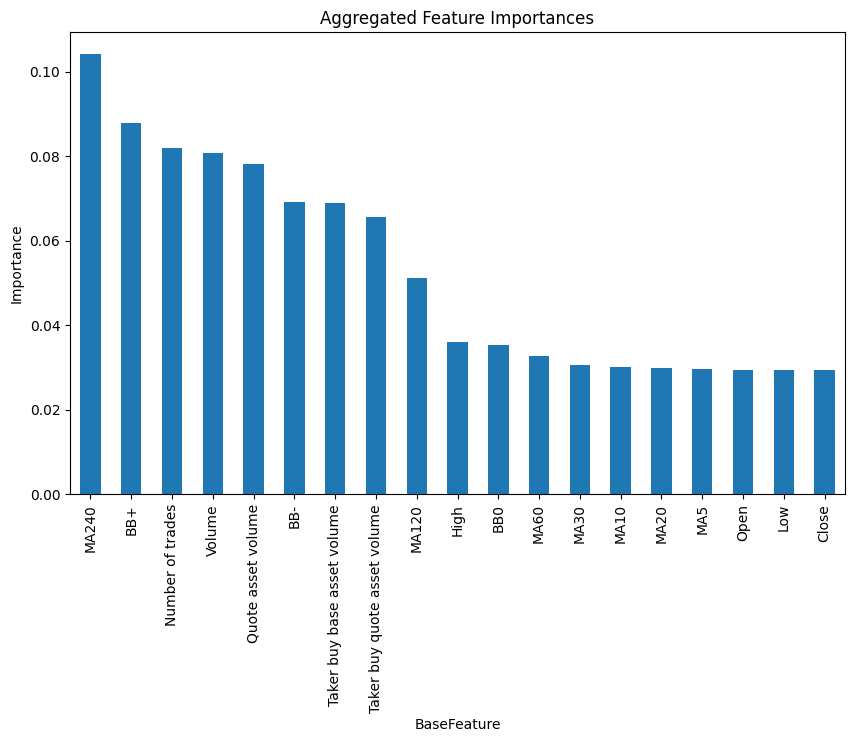

Sorted Aggregated Feature Importances:
BaseFeature
MA240                           0.104105
BB+                             0.087882
Number of trades                0.081973
Volume                          0.080813
Quote asset volume              0.078137
BB-                             0.069186
Taker buy base asset volume     0.068809
Taker buy quote asset volume    0.065622
MA120                           0.051181
High                            0.036129
BB0                             0.035309
MA60                            0.032801
MA30                            0.030549
MA10                            0.030014
MA20                            0.029857
MA5                             0.029618
Open                            0.029386
Low                             0.029321
Close                           0.029305


In [25]:
# Assuming importances and new_columns are defined
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Split the feature names and aggregate importances
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
aggregated_importances = feature_importance_df.groupby('BaseFeature')['Importance'].sum()

# Sort by importance
aggregated_importances = aggregated_importances.sort_values(ascending=False)

# Plot aggregated feature importances
aggregated_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of aggregated features and their importances
print("Sorted Aggregated Feature Importances:")
print(aggregated_importances.to_string())


In [26]:
import joblib

# Assuming your model is named RFC
joblib.dump(RFC, 'Models/RFC_model_40.pkl')

['Models/RFC_model_40.pkl']

# For matrix_array_60 = 3hour data

In [27]:
matrix_array_60 = np.load('Data/matrix_array_60_normalized.npy')
answer_array_60 = np.load('Data/answer_array_60.npy')


In [28]:
matrix_array_60.shape, answer_array_60.shape    

((587123, 60, 19), (587123, 3))

In [29]:
from sklearn.model_selection import train_test_split

X = matrix_array_60
y = answer_array_60


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1, stratify=y)

In [30]:
# Flatten the X_train data
# This assumes X_train is a list of numpy arrays with a shape of (20, 19)
X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])

# answer = chunk.iloc[i+19][['plus_6', 'minus_6', 'zero_6']].tolist()
# Assuming y_train is a list or array of arrays like [[1, 0, 0], [0, 1, 0], [0, 0, 1], ...]
y_train_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_train])
y_test_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_test])
# zero = 0, up = 1, down = -1

In [31]:
X_train_flattened.shape, X_test_flattened.shape, y_train_transformed.shape, y_test_transformed.shape

((528410, 1140), (58713, 1140), (528410,), (58713,))

In [32]:
np.unique(y_test_transformed)

array([-1,  0,  1])

In [33]:
del X, y, X_train, X_test, y_train, y_test, matrix_array_60, answer_array_60
import gc
gc.collect()

120573

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=1, verbose=1, n_jobs=-1)

In [35]:
RFC.fit(X_train_flattened, y_train_transformed)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.4min finished


RandomForestClassifier(n_jobs=-1, random_state=1, verbose=1)

In [36]:
# import joblib

# # import model
# RFC = joblib.load('Models/RFC_model_40.pkl')

In [37]:
y_pred = RFC.predict(X_test_flattened)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.9s finished


In [38]:
y_pred

array([-1,  1, -1, ...,  1,  1,  1])

In [39]:
np.unique(y_pred)

array([-1,  0,  1])

In [40]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8479382760206428
Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.85      0.85     20339
           0       0.83      0.87      0.85     18711
           1       0.87      0.82      0.84     19663

    accuracy                           0.85     58713
   macro avg       0.85      0.85      0.85     58713
weighted avg       0.85      0.85      0.85     58713



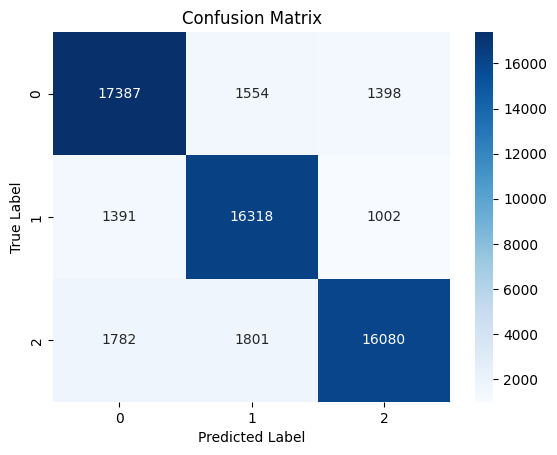

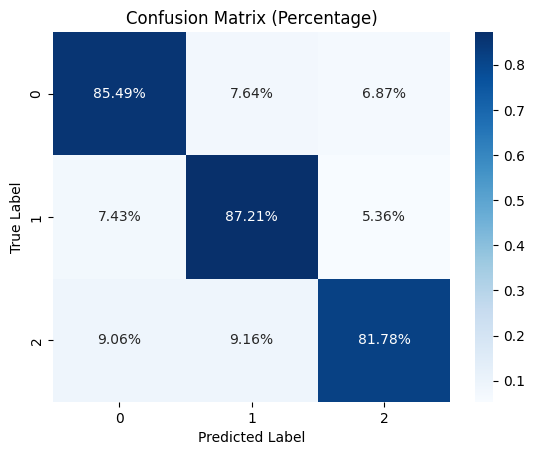

In [41]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
wrong_count = cm[0][1]+cm[0][2] + cm[1][0]+cm[1][2] + cm[2][0]+cm[2][1]
correct_count = cm[0][0] + cm[1][1] + cm[2][2]

print(f'wrong count : {wrong_count}, correct count : {correct_count}')
print(f'accuracy? : {100*correct_count/(wrong_count+correct_count)}') 

wrong count : 8928, correct count : 49785
accuracy? : 84.79382760206428


In [43]:
cm_normalized


array([[0.85486012, 0.07640494, 0.06873494],
       [0.0743413 , 0.87210732, 0.05355139],
       [0.09062707, 0.09159335, 0.81777959]])

In [44]:
'''
array([[0.67596461, 0.13406242, 0.18997297],
       [0.13425499, 0.76711414, 0.09863087],
       [0.2340539 , 0.14428606, 0.62166004]])
-1 -> -1 : 0.67
-1 -> 0  : 0.1340
-1 -> 1  : 0.18
0 -> -1 : 0.1342
0 -> 0  : 0.76
0 -> 1  : 0.09
'''

'\narray([[0.67596461, 0.13406242, 0.18997297],\n       [0.13425499, 0.76711414, 0.09863087],\n       [0.2340539 , 0.14428606, 0.62166004]])\n-1 -> -1 : 0.67\n-1 -> 0  : 0.1340\n-1 -> 1  : 0.18\n0 -> -1 : 0.1342\n0 -> 0  : 0.76\n0 -> 1  : 0.09\n'

In [45]:
data = pd.read_csv('Data/df_all.csv')
data = data.drop(['Open time', 'Close time', 'Ignore','up_cross','down_cross','minutes','log_minutes','side','plus_6','minus_6','zero_6'], axis=1)
print(data.columns)

# Rename columns
new_columns = []
for i in range(60):  # for each time step
    new_columns.extend([f"{col}_{i}" for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume','MA5','MA10','MA20','MA30','MA60','MA120','MA240', 'BB0','BB+','BB-' ]])
print(len(new_columns))

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')
1140


(1140,)


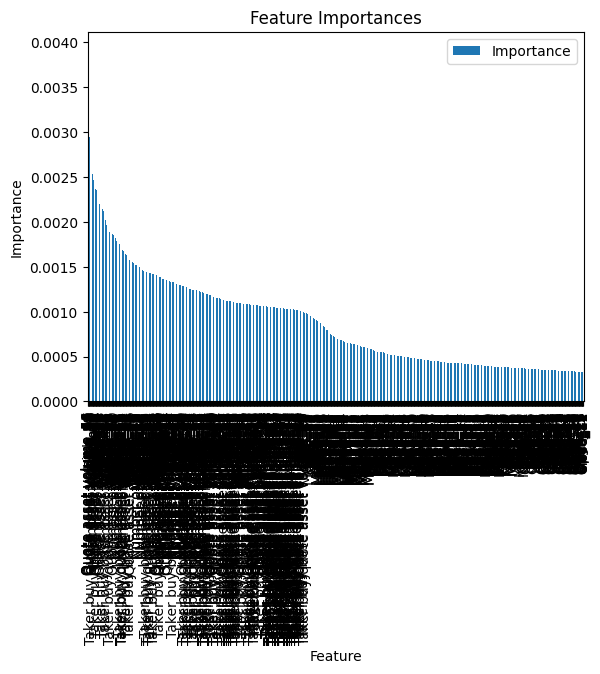

In [46]:
# Get feature importances
importances = RFC.feature_importances_
print(importances.shape)
# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

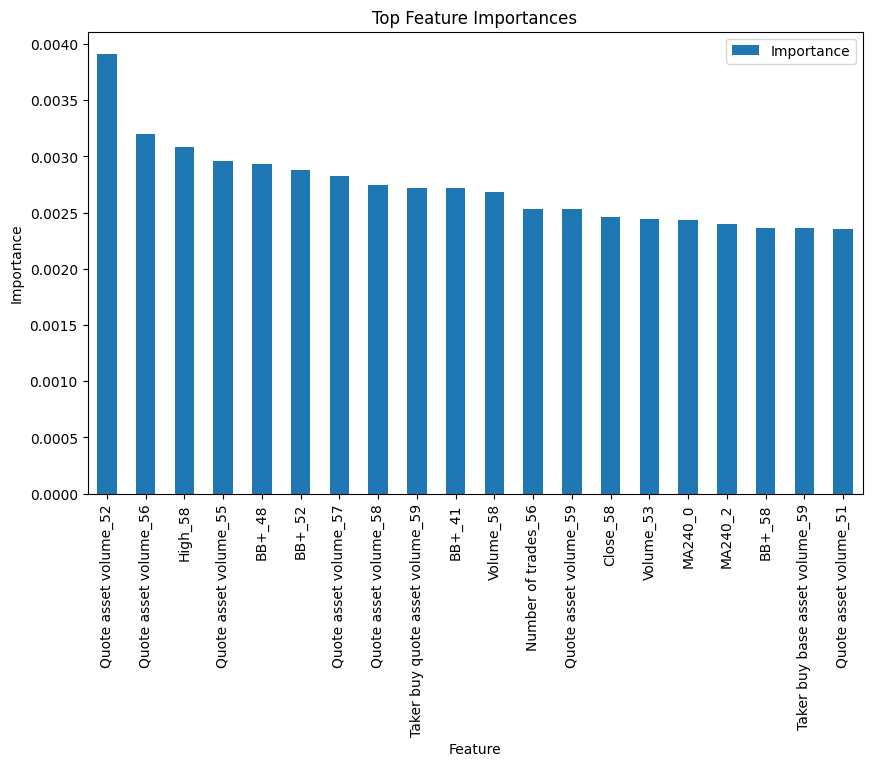

Sorted Feature Importances:
                        Feature  Importance
          Quote asset volume_52    0.003915
          Quote asset volume_56    0.003202
                        High_58    0.003081
          Quote asset volume_55    0.002958
                         BB+_48    0.002937
                         BB+_52    0.002884
          Quote asset volume_57    0.002829
          Quote asset volume_58    0.002747
Taker buy quote asset volume_59    0.002720
                         BB+_41    0.002720
                      Volume_58    0.002681
            Number of trades_56    0.002532
          Quote asset volume_59    0.002531
                       Close_58    0.002461
                      Volume_53    0.002447
                        MA240_0    0.002436
                        MA240_2    0.002399
                         BB+_58    0.002367
 Taker buy base asset volume_59    0.002366
          Quote asset volume_51    0.002358
                        MA240_3    0.002354
    

In [47]:
# Display the top N features in a bar chart
top_n = 20  # You can adjust this number
top_features = feature_importance_df.head(top_n)
top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Top Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of features and their importances
print("Sorted Feature Importances:")
print(feature_importance_df.to_string(index=False))

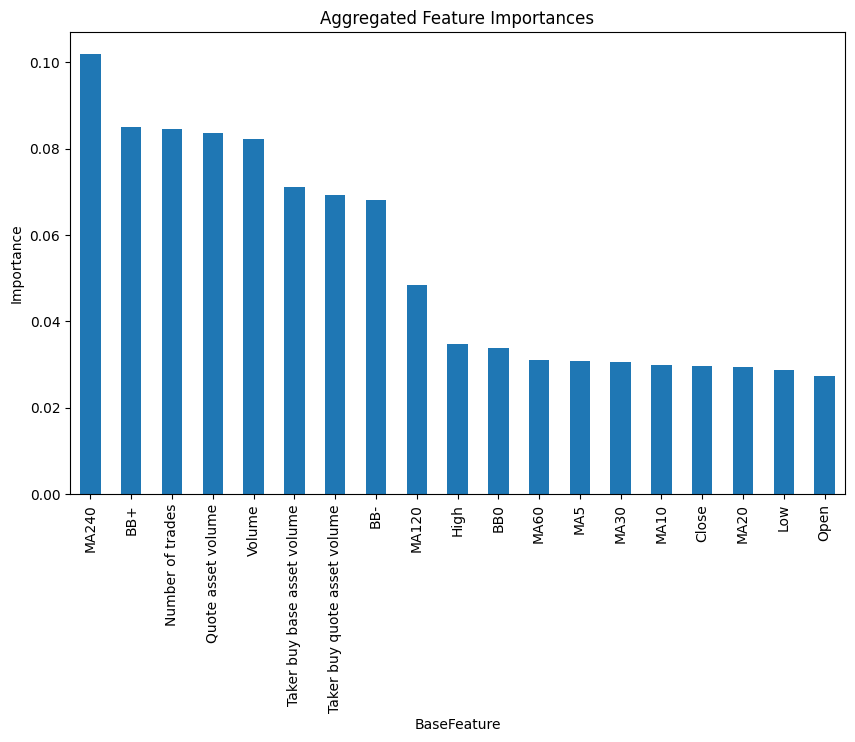

Sorted Aggregated Feature Importances:
BaseFeature
MA240                           0.101828
BB+                             0.084886
Number of trades                0.084440
Quote asset volume              0.083652
Volume                          0.082183
Taker buy base asset volume     0.071078
Taker buy quote asset volume    0.069335
BB-                             0.068010
MA120                           0.048408
High                            0.034842
BB0                             0.033866
MA60                            0.031132
MA5                             0.030821
MA30                            0.030569
MA10                            0.029827
Close                           0.029594
MA20                            0.029369
Low                             0.028736
Open                            0.027423


In [48]:
# Assuming importances and new_columns are defined
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Split the feature names and aggregate importances
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
aggregated_importances = feature_importance_df.groupby('BaseFeature')['Importance'].sum()

# Sort by importance
aggregated_importances = aggregated_importances.sort_values(ascending=False)

# Plot aggregated feature importances
aggregated_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of aggregated features and their importances
print("Sorted Aggregated Feature Importances:")
print(aggregated_importances.to_string())


In [49]:
import joblib

# Assuming your model is named RFC
joblib.dump(RFC, 'Models/RFC_model_60.pkl')

['Models/RFC_model_60.pkl']

# For matrix_array_80 = 4hour data

In [2]:
matrix_array_80 = np.load('Data/matrix_array_80_normalized.npy')
answer_array_80 = np.load('Data/answer_array_80.npy')


In [3]:
matrix_array_80.shape, answer_array_80.shape    

((586903, 80, 19), (586903, 3))

In [4]:
from sklearn.model_selection import train_test_split

X = matrix_array_80
y = answer_array_80


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1, stratify=y)

In [5]:
# Flatten the X_train data
# This assumes X_train is a list of numpy arrays with a shape of (20, 19)
X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])

# answer = chunk.iloc[i+19][['plus_6', 'minus_6', 'zero_6']].tolist()
# Assuming y_train is a list or array of arrays like [[1, 0, 0], [0, 1, 0], [0, 0, 1], ...]
y_train_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_train])
y_test_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_test])
# zero = 0, up = 1, down = -1

In [6]:
X_train_flattened.shape, X_test_flattened.shape, y_train_transformed.shape, y_test_transformed.shape

((528212, 1520), (58691, 1520), (528212,), (58691,))

In [7]:
np.unique(y_test_transformed)

array([-1,  0,  1])

In [8]:
del X, y, X_train, X_test, y_train, y_test, matrix_array_80, answer_array_80
import gc
gc.collect()

0

### Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=1, verbose=1, n_jobs=-1)

In [10]:
RFC.fit(X_train_flattened, y_train_transformed)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
python(21620) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 24.6min finished


RandomForestClassifier(n_jobs=-1, random_state=1, verbose=1)

In [11]:
# import joblib

# # import model
# RFC = joblib.load('Models/RFC_model_40.pkl')

In [12]:
y_pred = RFC.predict(X_test_flattened)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.0s finished


In [13]:
y_pred

array([ 0,  0,  0, ...,  1, -1,  0])

In [14]:
np.unique(y_pred)

array([-1,  0,  1])

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test_transformed, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8370959772367144
Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.84      0.84     20330
           0       0.81      0.86      0.84     18708
           1       0.86      0.81      0.84     19653

    accuracy                           0.84     58691
   macro avg       0.84      0.84      0.84     58691
weighted avg       0.84      0.84      0.84     58691



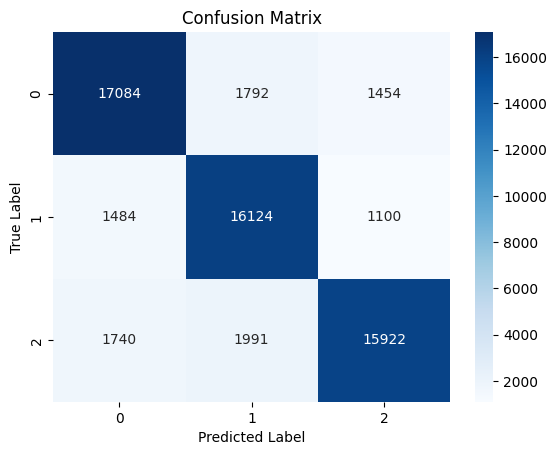

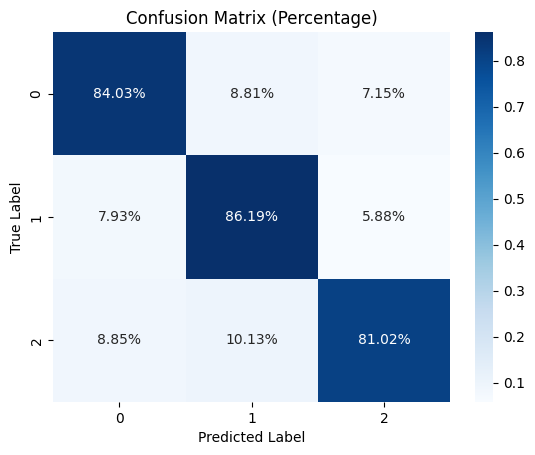

In [16]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming 'cm' is your confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
wrong_count = cm[0][1]+cm[0][2] + cm[1][0]+cm[1][2] + cm[2][0]+cm[2][1]
correct_count = cm[0][0] + cm[1][1] + cm[2][2]

print(f'wrong count : {wrong_count}, correct count : {correct_count}')
print(f'accuracy? : {100*correct_count/(wrong_count+correct_count)}') 

wrong count : 9561, correct count : 49130
accuracy? : 83.70959772367144


In [18]:
cm_normalized


array([[0.84033448, 0.0881456 , 0.07151992],
       [0.07932435, 0.86187727, 0.05879838],
       [0.0885361 , 0.10130769, 0.81015621]])

In [19]:
'''
array([[0.67596461, 0.13406242, 0.18997297],
       [0.13425499, 0.76711414, 0.09863087],
       [0.2340539 , 0.14428606, 0.62166004]])
-1 -> -1 : 0.67
-1 -> 0  : 0.1340
-1 -> 1  : 0.18
0 -> -1 : 0.1342
0 -> 0  : 0.76
0 -> 1  : 0.09
'''

'\narray([[0.67596461, 0.13406242, 0.18997297],\n       [0.13425499, 0.76711414, 0.09863087],\n       [0.2340539 , 0.14428606, 0.62166004]])\n-1 -> -1 : 0.67\n-1 -> 0  : 0.1340\n-1 -> 1  : 0.18\n0 -> -1 : 0.1342\n0 -> 0  : 0.76\n0 -> 1  : 0.09\n'

In [20]:
data = pd.read_csv('Data/df_all.csv')
data = data.drop(['Open time', 'Close time', 'Ignore','up_cross','down_cross','minutes','log_minutes','side','plus_6','minus_6','zero_6'], axis=1)
print(data.columns)

# Rename columns
new_columns = []
for i in range(80):  # for each time step
    new_columns.extend([f"{col}_{i}" for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume','MA5','MA10','MA20','MA30','MA60','MA120','MA240', 'BB0','BB+','BB-' ]])
print(len(new_columns))

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')
1520


(1520,)


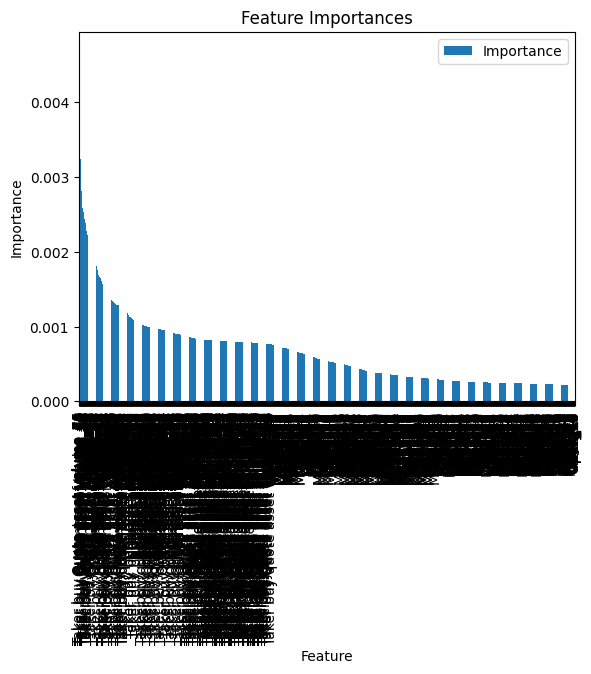

In [21]:
# Get feature importances
importances = RFC.feature_importances_
print(importances.shape)
# Convert to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

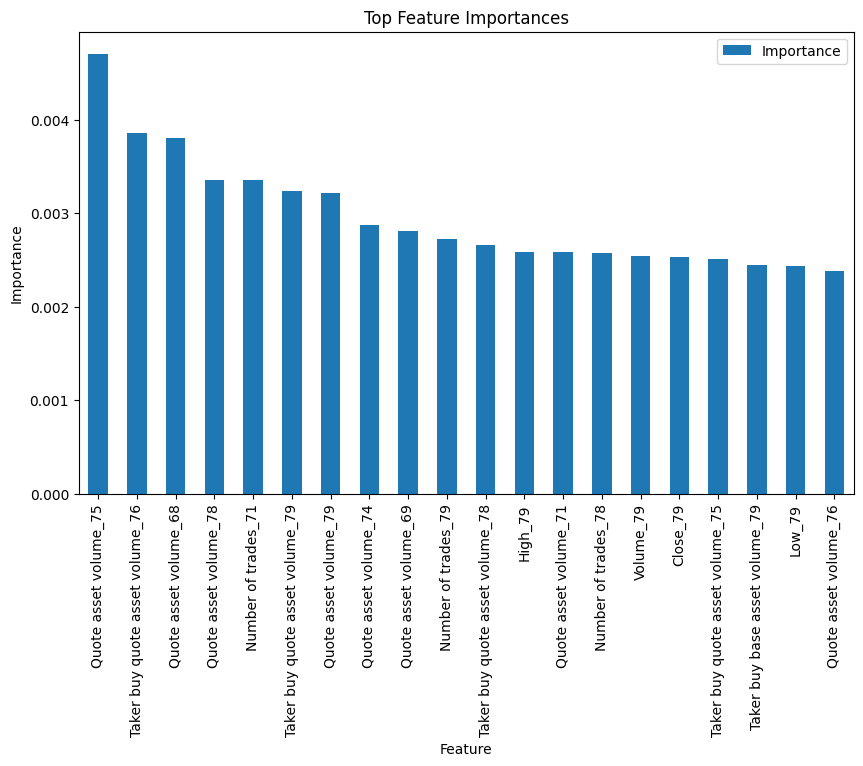

Sorted Feature Importances:
                        Feature  Importance
          Quote asset volume_75    0.004705
Taker buy quote asset volume_76    0.003861
          Quote asset volume_68    0.003801
          Quote asset volume_78    0.003352
            Number of trades_71    0.003349
Taker buy quote asset volume_79    0.003235
          Quote asset volume_79    0.003213
          Quote asset volume_74    0.002870
          Quote asset volume_69    0.002808
            Number of trades_79    0.002722
Taker buy quote asset volume_78    0.002663
                        High_79    0.002583
          Quote asset volume_71    0.002582
            Number of trades_78    0.002570
                      Volume_79    0.002537
                       Close_79    0.002528
Taker buy quote asset volume_75    0.002507
 Taker buy base asset volume_79    0.002443
                         Low_79    0.002430
          Quote asset volume_76    0.002383
          Quote asset volume_67    0.002382
    

In [22]:
# Display the top N features in a bar chart
top_n = 20  # You can adjust this number
top_features = feature_importance_df.head(top_n)
top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Top Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of features and their importances
print("Sorted Feature Importances:")
print(feature_importance_df.to_string(index=False))

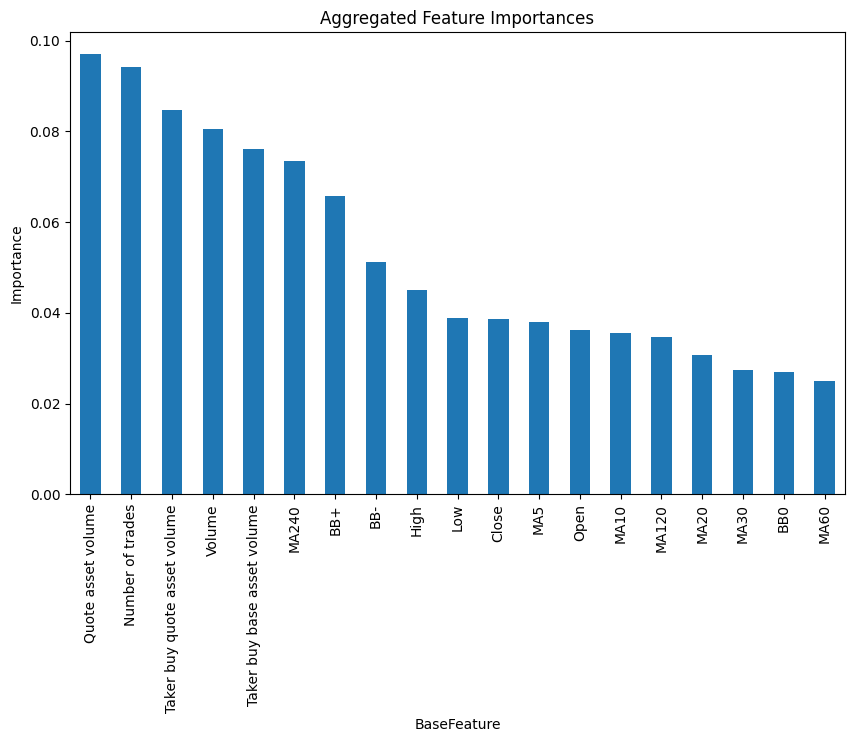

Sorted Aggregated Feature Importances:
BaseFeature
Quote asset volume              0.097008
Number of trades                0.094194
Taker buy quote asset volume    0.084785
Volume                          0.080537
Taker buy base asset volume     0.076187
MA240                           0.073497
BB+                             0.065666
BB-                             0.051259
High                            0.045094
Low                             0.038947
Close                           0.038617
MA5                             0.037953
Open                            0.036217
MA10                            0.035459
MA120                           0.034748
MA20                            0.030603
MA30                            0.027330
BB0                             0.027008
MA60                            0.024891


In [23]:
# Assuming importances and new_columns are defined
feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

# Split the feature names and aggregate importances
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
aggregated_importances = feature_importance_df.groupby('BaseFeature')['Importance'].sum()

# Sort by importance
aggregated_importances = aggregated_importances.sort_values(ascending=False)

# Plot aggregated feature importances
aggregated_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted list of aggregated features and their importances
print("Sorted Aggregated Feature Importances:")
print(aggregated_importances.to_string())


In [24]:
import joblib

# Assuming your model is named RFC
joblib.dump(RFC, 'Models/RFC_model_80.pkl')

['Models/RFC_model_80.pkl']